Q 02 = Simple Linear Regression Salary Hike

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_csv('/content/drive/MyDrive/DS Data Sets/Simple Linear Regression/Salary_Data.csv')

In [6]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [18]:
# null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [19]:
# duplicated values
df[df.duplicated()].shape

(0, 2)

In [20]:
df[df.duplicated()]

,YearsExperience,Salary


<Axes: xlabel='YearsExperience', ylabel='Density'>

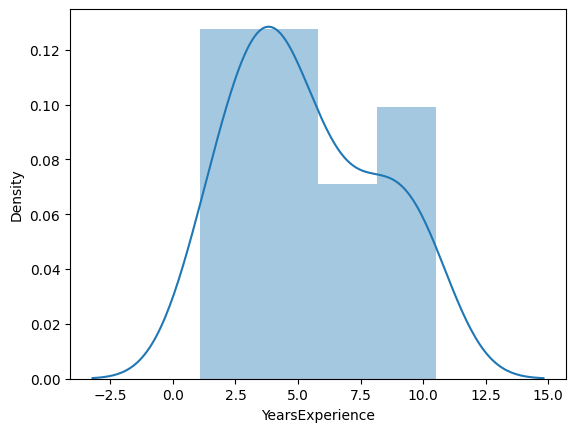

In [13]:
# EDA and Data Visualisation
sns.distplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

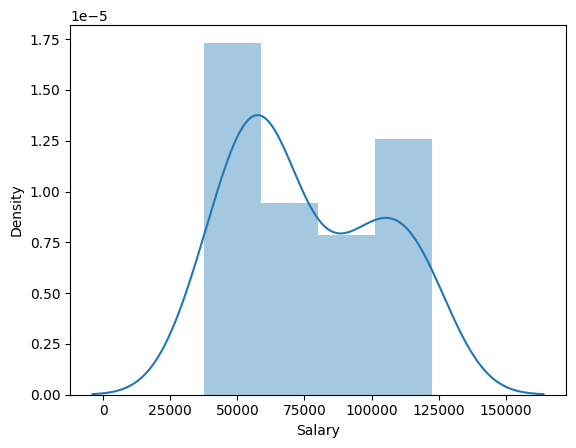

In [14]:
sns.distplot(df['Salary'])

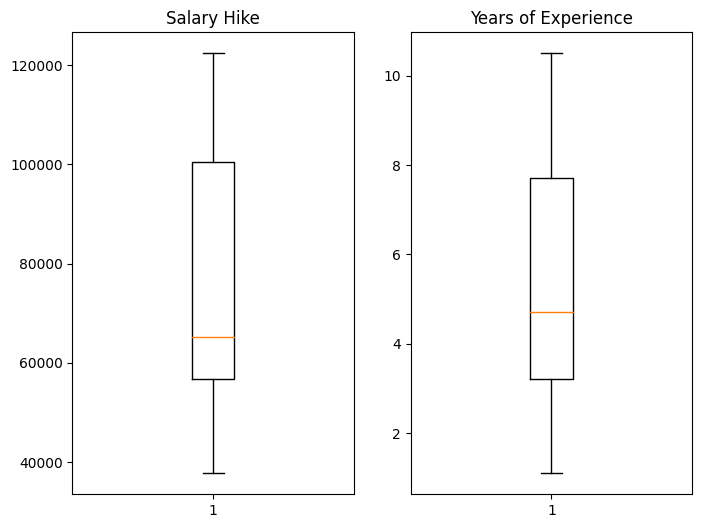

In [24]:
# box plots
plt.subplots(figsize=(8,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [15]:
# corelation analysis
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

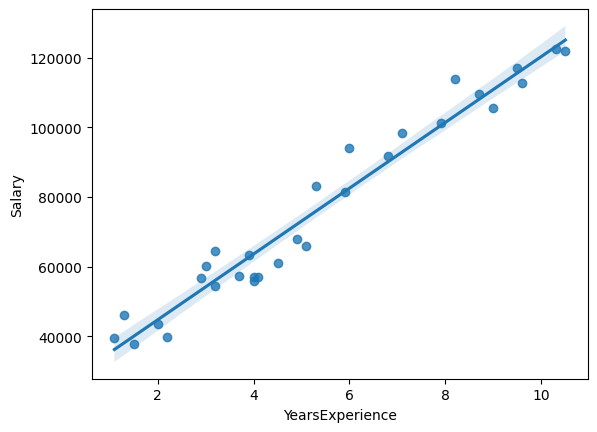

In [26]:
# regression plot
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [28]:
import statsmodels.formula.api as smf

In [29]:
# model building
model = smf.ols("Salary~YearsExperience",data=df).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        08:21:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# finding coeffecient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [33]:
# finding Tvalues and Pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [34]:
# finding Rsquared values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [37]:
# model predictions
# manual prediction for 6 years of experience
Salary = (25792.200199) + (9449.962321)*6
Salary

82491.97412500001

In [39]:
# auto prediction for say 6 & 8 Years of experience

In [41]:
df2=pd.Series([6,8])
df2

0    6
1    8
dtype: int64

In [44]:
df_pred=pd.DataFrame(df2,columns=['YearsExperience'])
df_pred

,YearsExperience
0,6
1,8


In [47]:
hikes = pd.DataFrame()
hikes['YearsExperience'] = df.YearsExperience
hikes['Salary'] = df.Salary
hikes['Salary Hike'] = pd.DataFrame(model.predict(hikes.YearsExperience))
hikes


,YearsExperience,Salary,Salary Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
